# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [3]:
estimators = [
    ('k_means_8', KMeans(n_clusters=8)),
    ('k_means_2', KMeans(n_clusters=2)),
    ('k_means_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))
]

[1 5 5 5 1 1 5 1 5 5 1 5 5 5 1 1 1 1 1 1 1 1 5 1 5 5 1 1 1 5 5 1 1 1 5 5 1
 1 5 1 1 5 5 1 1 5 1 5 1 5 2 2 2 7 2 7 2 6 2 7 6 7 7 2 7 2 7 7 2 7 4 7 4 2
 2 2 2 2 2 7 7 7 7 4 7 2 2 2 7 7 7 2 7 6 7 7 7 2 6 7 0 4 3 0 0 3 7 3 0 3 0
 4 0 4 4 0 0 3 3 4 0 4 3 4 0 3 4 4 0 3 3 3 0 4 4 3 0 0 4 0 0 0 4 0 0 0 4 0
 0 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


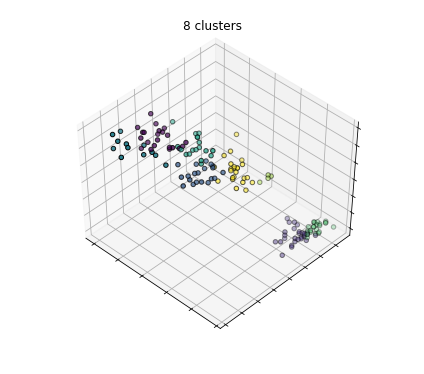

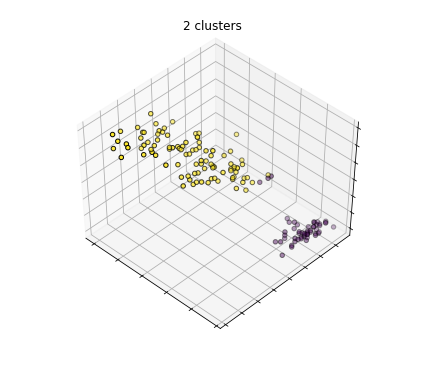

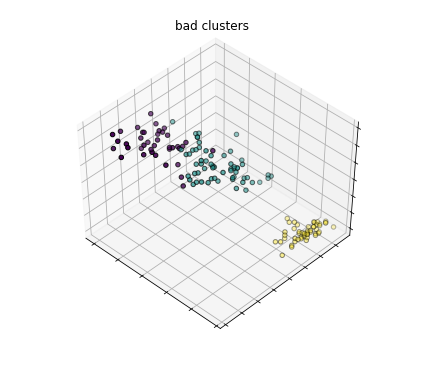

In [4]:
fignum = 1
titles = ['8 clusters', '2 clusters', 'bad clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 5))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    est.fit(X)
    
    labels = est.labels_
    print(labels)
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

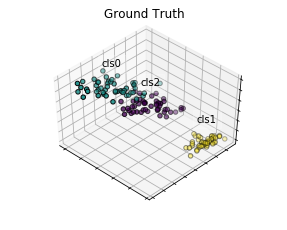

In [8]:
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

y = np.choose(y, [1, 2, 0]).astype(int)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12